Дан датасет с данными о футболистах в футбольном симуляторе fifa(15-20), перед нами стоит задача регресси - обучение модели так, чтобы она могла предсказывать общий рейтинг футболиста по остальным его данным.

##Подключение необходимых библиотек


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
from matplotlib import pyplot as plt
import sklearn
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Открытие файлов



Создаем функцию, в которой открываем файлы и выбираем из них необходимые нам столбцы.


In [ ]:
def file_open(fileName):
  with open('/content/drive/MyDrive/FifaData/' + fileName, 'r') as file1:
    needed_col = [2, 4, 10, 14, 17, 18, 31, 32, 33, 34, 35, 36]                          # индексы нужных столбцов
    new_csv = []                              # новый список для нового файла
    reader = csv.reader(file1, delimiter=",")
    for row in reader:
        col = list(row[i] for i in needed_col)
        new_csv.append(col)                   # заполняем новый список нужными столбцами
  with open(fileName + 'new.csv', 'w') as file2:               # создаем новый файл
    writer = csv.writer(file2, delimiter=",")
    writer.writerows(new_csv)
    return(pd.read_csv(fileName +'new.csv', index_col=0))

Открываем все файлы и передаем в переменные

In [ ]:
df15 = file_open('Fifa15.csv')
df16 = file_open('Fifa16.csv')
df17 = file_open('Fifa17.csv')
df18 = file_open('Fifa18.csv')
df19 = file_open('Fifa19.csv')
df20 = file_open('Fifa20.csv')

Объединяем все файлы в 1, добавляя счетчик

In [ ]:
df= pd.concat([df15, df16, df17, df18, df19, df20])
df = df[df.player_positions != 'GK'].reset_index()
df

,short_name,age,overall,player_positions,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,27,93,CF,3,4,93.0,89.0,86.0,96.0,27.0,63.0
1,Cristiano Ronaldo,29,92,"LW, LM",4,5,93.0,93.0,81.0,91.0,32.0,79.0
2,A. Robben,30,90,"RM, LM, RW",2,4,93.0,86.0,83.0,92.0,32.0,64.0
3,Z. Ibrahimović,32,90,ST,4,4,76.0,91.0,81.0,86.0,34.0,86.0
4,L. Suárez,27,89,"ST, CF",4,4,83.0,87.0,79.0,88.0,42.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...
89502,M. Sagaf,21,48,CM,3,2,61.0,36.0,47.0,44.0,38.0,53.0
89503,E. Tweed,20,48,CM,3,2,52.0,37.0,47.0,46.0,42.0,49.0
89504,Shao Shuai,22,48,CB,3,2,57.0,23.0,28.0,33.0,47.0,51.0
89505,Xiao Mingjie,22,48,CB,2,2,58.0,24.0,33.0,35.0,48.0,48.0


## EDA

Подсчитаем количество null значений в каждом столбце

In [ ]:
df.isnull().sum()

short_name          0
age                 0
overall             0
player_positions    0
weak_foot           0
skill_moves         0
pace                0
shooting            0
passing             0
dribbling           0
defending           0
physic              0
dtype: int64

Проверим какие типы данных в наших столбцах

In [ ]:
df.dtypes

short_name           object
age                   int64
overall               int64
player_positions     object
weak_foot             int64
skill_moves           int64
pace                float64
shooting            float64
passing             float64
dribbling           float64
defending           float64
physic              float64
dtype: object

В столбцах, где тип данных указан как float проверяем, есть ли значения с ненулевой десятой частью числа и, если таких нет, меняем тип данных на int

In [ ]:
for column in df.columns:
  if df[column].dtype == 'float':
    flag = False
    for x in df[column]:
      if abs(x - int(x)) != 0:
             flag = True
             break
      if flag == False:
        df[column]= df[column]. astype(int)
df.dtypes

short_name          object
age                  int64
overall              int64
player_positions    object
weak_foot            int64
skill_moves          int64
pace                 int64
shooting             int64
passing              int64
dribbling            int64
defending            int64
physic               int64
dtype: object

In [ ]:
df

,short_name,age,overall,player_positions,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,27,93,CF,3,4,93,89,86,96,27,63
1,Cristiano Ronaldo,29,92,"LW, LM",4,5,93,93,81,91,32,79
2,A. Robben,30,90,"RM, LM, RW",2,4,93,86,83,92,32,64
3,Z. Ibrahimović,32,90,ST,4,4,76,91,81,86,34,86
4,L. Suárez,27,89,"ST, CF",4,4,83,87,79,88,42,79
...,...,...,...,...,...,...,...,...,...,...,...,...
89502,M. Sagaf,21,48,CM,3,2,61,36,47,44,38,53
89503,E. Tweed,20,48,CM,3,2,52,37,47,46,42,49
89504,Shao Shuai,22,48,CB,3,2,57,23,28,33,47,51
89505,Xiao Mingjie,22,48,CB,2,2,58,24,33,35,48,48


График зависимости рейтинга от возраста

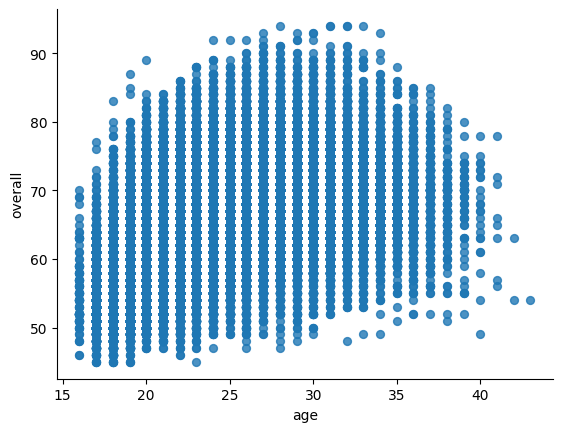

In [ ]:
df.plot(kind='scatter', x='age', y='overall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


Графики изменений значений в столбцах с отметками максимумов и минимумов

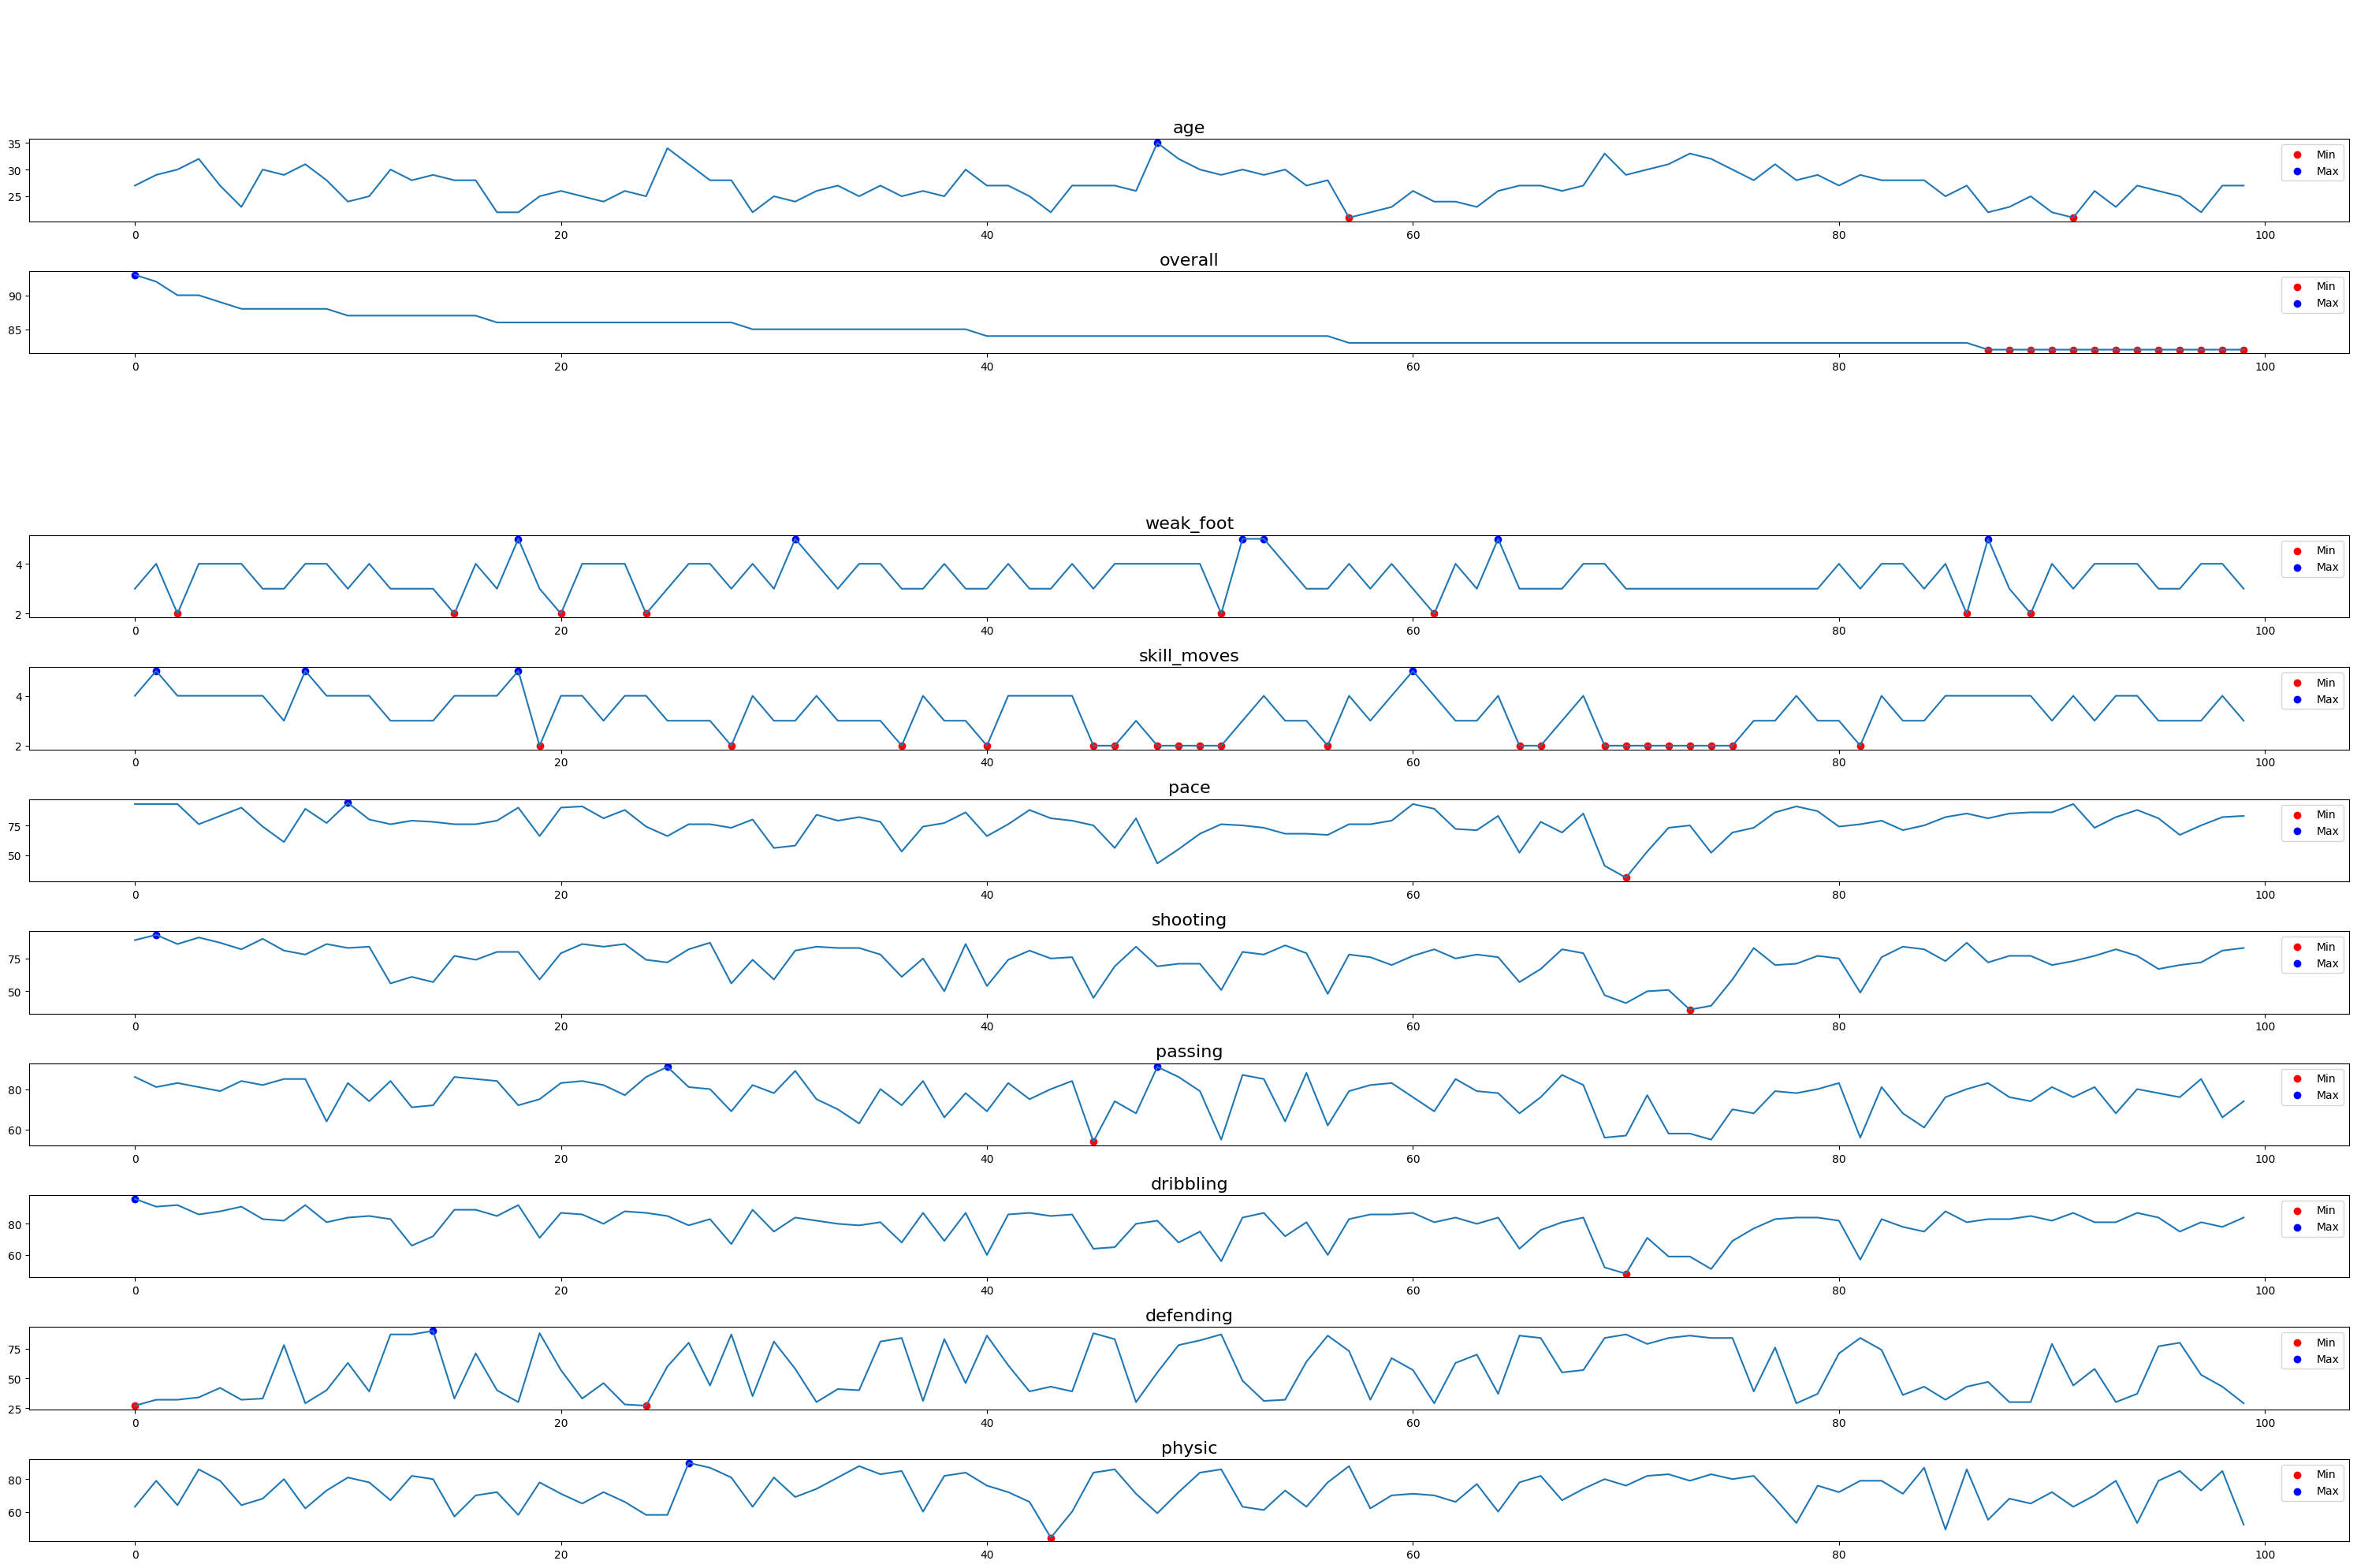

In [ ]:
df_head = df.head(100)
fig, axes = plt.subplots(nrows=len(df_head.columns), figsize=(30, 20))

for i, column in enumerate(df_head.columns):
    if i not in [0, 3]:  # исключаем столбцы 0 и 3
        ax = axes[i]
        df_column = df_head[column]
        ax.plot(df_column)

        min_val = df_column.min()
        max_val = df_column.max()

        min_indices = df_column[df_column == min_val].index
        max_indices = df_column[df_column == max_val].index

        ax.scatter(min_indices, [min_val]*len(min_indices), color='red', label='Min') # точки на минимальных значениях
        ax.scatter(max_indices, [max_val]*len(max_indices), color='blue', label='Max') # точки на максимальных значениях

        ax.legend() # добавляем легенду
        ax.set_title(column, fontsize = 16)
    else:
        ax = axes[i]
        ax.axis('off')  # скрываем оси для графиков 0 и 3

plt.tight_layout()
plt.show()


График средних значений по каждому столбцу

<ipython-input-11-681210225b94>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  p = sns.barplot(data=df, ci=False)
<ipython-input-11-681210225b94>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(p.get_xticklabels(), rotation=45)


[Text(0, 0, 'age'),
 Text(1, 0, 'overall'),
 Text(2, 0, 'weak_foot'),
 Text(3, 0, 'skill_moves'),
 Text(4, 0, 'pace'),
 Text(5, 0, 'shooting'),
 Text(6, 0, 'passing'),
 Text(7, 0, 'dribbling'),
 Text(8, 0, 'defending'),
 Text(9, 0, 'physic')]

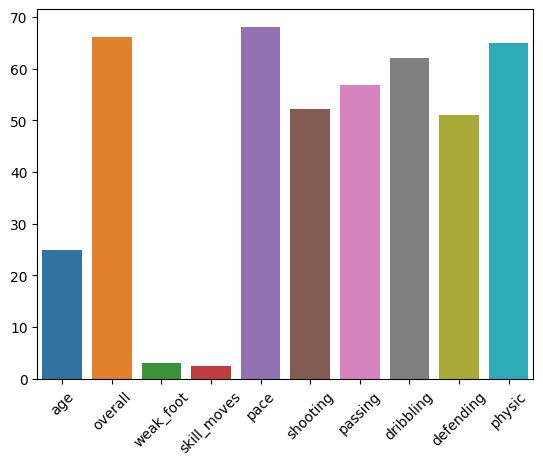

In [ ]:
p = sns.barplot(data=df, ci=False)
p.set_xticklabels(p.get_xticklabels(), rotation=45)

## Подготовка данных


Векторизация

Векторизация нужна только для столбца player_positions, чтобы из текстовых значений получить числа для обучения модели.

Так как в этой категории не важен порядок, то используем метод One-Hot Encoding

In [ ]:
all_positions = []
for positions in df['player_positions']:
    for position in positions.split(','):
        all_positions.append(position.strip())
unique_positions = set(all_positions)
print (unique_positions)

{'RW', 'LM', 'LWB', 'LW', 'CDM', 'LB', 'CM', 'RM', 'ST', 'CAM', 'RB', 'RWB', 'CB', 'CF'}


In [ ]:
for pos in unique_positions:
    df[pos] = df['player_positions'].str.contains(pos).astype(int)
df.drop('player_positions', axis = 1)

,short_name,age,overall,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,...,CDM,LB,CM,RM,ST,CAM,RB,RWB,CB,CF
0,L. Messi,27,93,3,4,93,89,86,96,27,...,0,0,0,0,0,0,0,0,0,1
1,Cristiano Ronaldo,29,92,4,5,93,93,81,91,32,...,0,0,0,0,0,0,0,0,0,0
2,A. Robben,30,90,2,4,93,86,83,92,32,...,0,0,0,1,0,0,0,0,0,0
3,Z. Ibrahimović,32,90,4,4,76,91,81,86,34,...,0,0,0,0,1,0,0,0,0,0
4,L. Suárez,27,89,4,4,83,87,79,88,42,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89502,M. Sagaf,21,48,3,2,61,36,47,44,38,...,0,0,1,0,0,0,0,0,0,0
89503,E. Tweed,20,48,3,2,52,37,47,46,42,...,0,0,1,0,0,0,0,0,0,0
89504,Shao Shuai,22,48,3,2,57,23,28,33,47,...,0,0,0,0,0,0,0,0,1,0
89505,Xiao Mingjie,22,48,2,2,58,24,33,35,48,...,0,0,0,0,0,0,0,0,1,0


Напишем функцию для масштабирования

In [ ]:
def scale_column(column, old_min, old_max, new_min, new_max):
    return ((column - old_min) / (old_max - old_min)) * (new_max - new_min) + new_min

Масштабирование столбцов skill_moves и weak_foot от 1-5 к 15-97

In [ ]:
df['weak_foot'] = scale_column(df['weak_foot'], 1, 5, 15, 97).astype(int)
df['skill_moves'] = scale_column(df['skill_moves'], 1, 5, 15, 97).astype(int)
df

,short_name,age,overall,player_positions,weak_foot,skill_moves,pace,shooting,passing,dribbling,...,CDM,LB,CM,RM,ST,CAM,RB,RWB,CB,CF
0,L. Messi,27,93,CF,56,76,93,89,86,96,...,0,0,0,0,0,0,0,0,0,1
1,Cristiano Ronaldo,29,92,"LW, LM",76,97,93,93,81,91,...,0,0,0,0,0,0,0,0,0,0
2,A. Robben,30,90,"RM, LM, RW",35,76,93,86,83,92,...,0,0,0,1,0,0,0,0,0,0
3,Z. Ibrahimović,32,90,ST,76,76,76,91,81,86,...,0,0,0,0,1,0,0,0,0,0
4,L. Suárez,27,89,"ST, CF",76,76,83,87,79,88,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89502,M. Sagaf,21,48,CM,56,35,61,36,47,44,...,0,0,1,0,0,0,0,0,0,0
89503,E. Tweed,20,48,CM,56,35,52,37,47,46,...,0,0,1,0,0,0,0,0,0,0
89504,Shao Shuai,22,48,CB,56,35,57,23,28,33,...,0,0,0,0,0,0,0,0,1,0
89505,Xiao Mingjie,22,48,CB,35,35,58,24,33,35,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.columns

Index(['short_name', 'age', 'overall', 'player_positions', 'weak_foot',
       'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physic', 'RW', 'LM', 'LWB', 'LW', 'CDM', 'LB', 'CM', 'RM', 'ST', 'CAM',
       'RB', 'RWB', 'CB', 'CF'],
      dtype='object')

Разбиваем данные на x_train, x_test, y_train, y_test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['age', 'weak_foot', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'LWB', 'LB',
                                                        'RW', 'RWB', 'CF', 'CDM', 'RB', 'LW', 'CAM', 'CB', 'RM', 'CM', 'LM', 'ST']],
                                                    df['overall'], train_size = 0.8, test_size = 0.2, random_state = 42)
print (x_train)
print (x_test)
print (y_train)
print (y_test)

       age  weak_foot  skill_moves  pace  shooting  passing  dribbling  \
36416   22         56           56    72        65       63         67   
8783    28         35           56    62        62       61         59   
25694   27         56           56    70        47       55         60   
41611   19         35           35    54        26       29         31   
48299   25         56           35    74        67       67         71   
...    ...        ...          ...   ...       ...      ...        ...   
6265    34         56           35    38        46       43         48   
54886   20         56           35    65        34       49         60   
76820   29         56           56    85        65       68         72   
860     26         35           35    52        41       51         54   
15795   25         35           35    62        48       37         46   

       defending  physic  LWB  ...  CF  CDM  RB  LW  CAM  CB  RM  CM  LM  ST  
36416         38      64    0  .

##Обучение моделей и прогнозирование

Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(x_train, y_train)
predictions1 = np.round(model1.predict(x_test)).astype(int)
predictions1

array([64, 60, 71, ..., 62, 61, 67])

RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state = 42).fit(x_train, y_train)
predictions2 = np.round(model2.predict(x_test)).astype(int)
predictions2

array([65, 58, 72, ..., 65, 60, 66])

XGBoost

In [ ]:
import xgboost as xgb
model3 = xgb.XGBRegressor(random_state = 42).fit(x_train, y_train)
predictions3 = np.round(model3.predict(x_test)).astype(int)
predictions3

array([64, 57, 71, ..., 67, 60, 66])

##Loss(MSE) и Метрики (**MAPE**, R^2, MAE)


Loss(MSE)

Loss для линейной регрессии

In [ ]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test, predictions1)
print('MSE1:', mse1)

MSE1: 9.045749078315271


Loss для RandomForest

In [ ]:
mse2 = mean_squared_error(y_test, predictions2)
print('MSE2:', mse2)

MSE2: 1.8871075857446096


Loss для XGBoost

In [ ]:
mse3 = mean_squared_error(y_test, predictions3)
print('MSE3:', mse3)

MSE3: 1.895598257177969


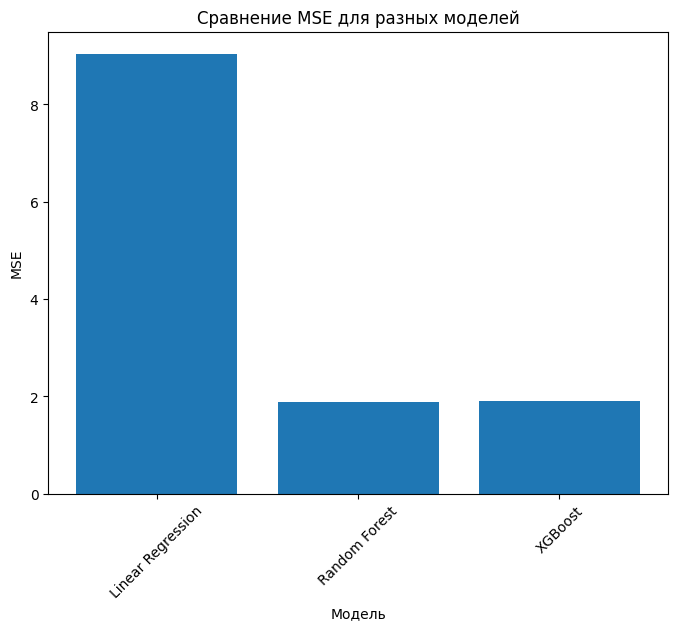

In [ ]:
mse_results = {'Linear Regression': mse1, 'Random Forest': mse2, 'XGBoost': mse3}
plt.figure(figsize=(8, 6))
plt.bar(mse_results.keys(), mse_results.values())
plt.xlabel('Модель')
plt.ylabel('MSE')
plt.title('Сравнение MSE для разных моделей')
plt.xticks(rotation=45)
plt.show()

MAPE

MAPE для линейной регрессии

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape1 = mean_absolute_percentage_error(y_test, predictions1)
print('MAPE1:', mape1)

MAPE1: 0.03594851611977135


MAPE для RandomForest

In [ ]:
mape2 = mean_absolute_percentage_error(y_test, predictions2)
print('MAPE2:', mape2)

MAPE2: 0.01530159499692412


MAPE для XGBoost

In [ ]:
mape3 = mean_absolute_percentage_error(y_test, predictions3)
print('MAPE3:', mape3)

MAPE3: 0.01561213339055906


График сравнения MAPE

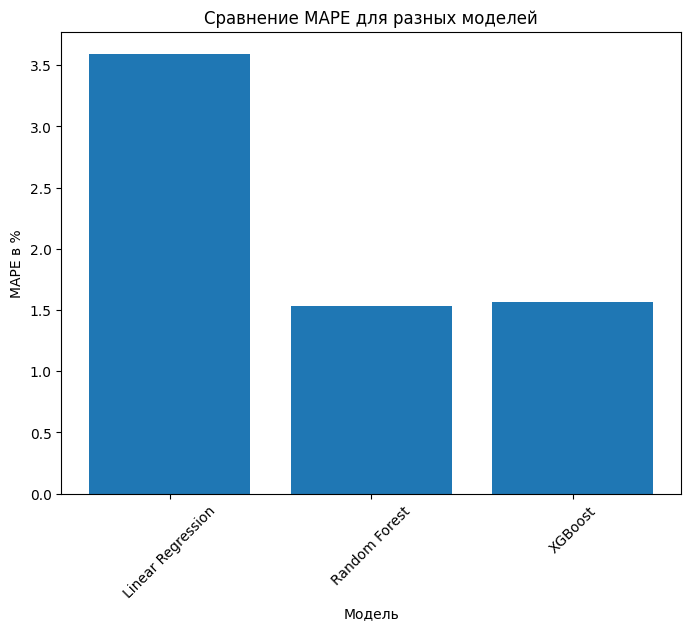

In [ ]:
mape_results = {'Linear Regression': mape1 * 100, 'Random Forest': mape2 * 100, 'XGBoost': mape3 * 100}
plt.figure(figsize=(8, 6))
plt.bar(mape_results.keys(), mape_results.values())
plt.xlabel('Модель')
plt.ylabel('MAPE в %')
plt.title('Сравнение MAPE для разных моделей')
plt.xticks(rotation=45)
plt.show()

R^2

R^2 для линейной регрессии

In [ ]:
from sklearn.metrics import r2_score
r21 = r2_score(y_test, predictions1)
print('r^2:', r21)

r^2: 0.8115824062937826


R^2 для Random Forest

In [ ]:
r22 = r2_score(y_test, predictions2)
print('r^2:', r22)

r^2: 0.9606926670978396


R^2 для XGBoost

In [ ]:
r23 = r2_score(y_test, predictions3)
print('r^3:', r23)

r^3: 0.960515811442595


График сравнения R^2

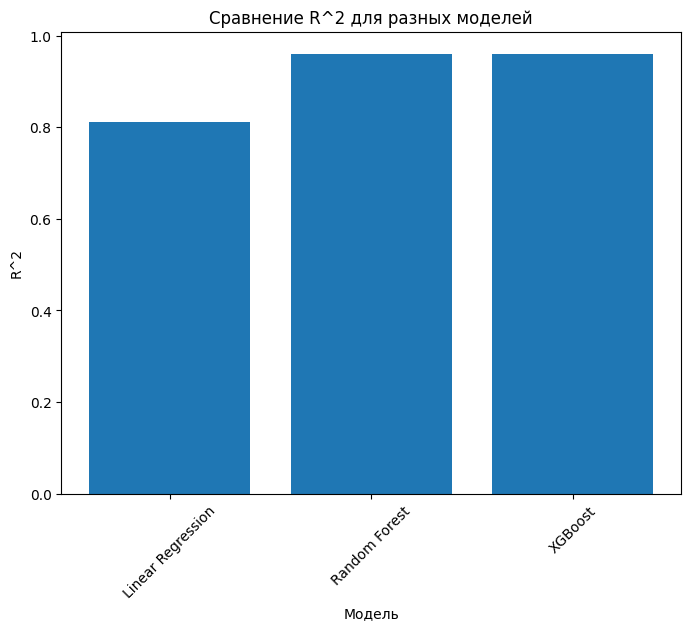

In [ ]:
r2_results = {'Linear Regression': r21, 'Random Forest': r22, 'XGBoost': r23}
plt.figure(figsize=(8, 6))
plt.bar(r2_results.keys(), r2_results.values())
plt.xlabel('Модель')
plt.ylabel('R^2')
plt.title('Сравнение R^2 для разных моделей')
plt.xticks(rotation=45)
plt.show()

MAE


MAE для линейной регрессии


In [ ]:
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(y_test, predictions1)
print('MAE1:', mae1)

MAE1: 2.356105463076751


MAE для RandomForest

In [ ]:
mae2 = mean_absolute_error(y_test, predictions2)
print('MAE2:', mae2)

MAE2: 0.991006591442297


MAE для XGBoost

In [ ]:
mae3 = mean_absolute_error(y_test, predictions2)
print('MAE3:', mae3)

MAE3: 0.991006591442297


График сравнения MAE

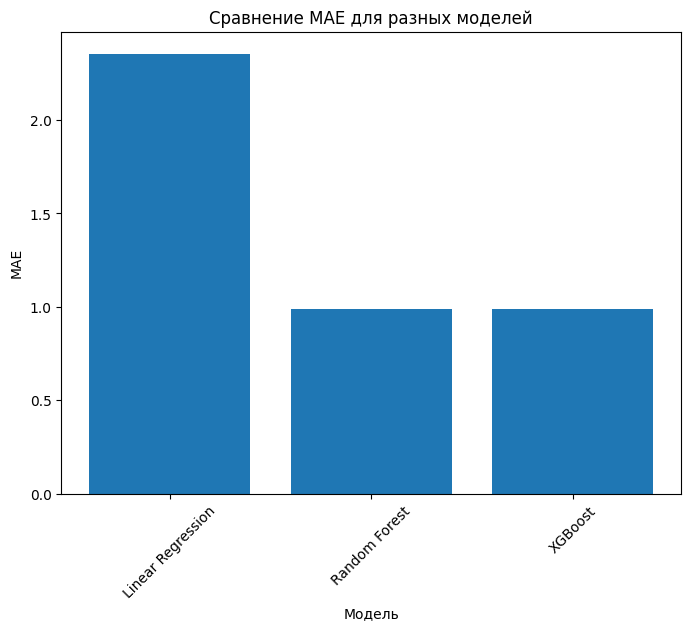

In [ ]:
mae_results = {'Linear Regression': mae1, 'Random Forest': mae2, 'XGBoost': mae3}
plt.figure(figsize=(8, 6))
plt.bar(mae_results.keys(), mae_results.values())
plt.xlabel('Модель')
plt.ylabel('MAE')
plt.title('Сравнение MAE для разных моделей')
plt.xticks(rotation=45)
plt.show()

## Вывод


В ходе работы по вычислению рейтинга футболиста был проведен разведочный анализ данных(EDA), который помог получить представление о наборе данных, с которым предстояло работать.

Данные были преобразованы и подготовлены к использованию моделей машинного обучения.

Было выбрано несколько моделей: Линейная регрессия, Random Forest и XGBoost. После обучения и запуска моделей были получены определенные результаты.

Далее, при сравнении результатов работы, было выявлено, что модель **Random Forest** превзошла другие модели по MSE *(1.8871075857446096 против 9.045749078315271 для Линейной регрессии и 1.895598257177969 для XGBoost)* и **MAPE** *(1.53 против 3.59 для Линейной регрессии и 1.56 для XGBoost)*.


---


Эти результаты позволяют сделать вывод о том, что модель случайного леса является наиболее эффективным инструментом для вычисления рейтинга футболиста на основе имеющихся данных.

Данное исследование показывает перспективность использования машинного обучения в спортивной аналитике, что открывает широкие возможности для оптимизации и улучшения процессов принятия решений в футболе.


---

